<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Spatial Estimation with Inverse Distance 


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
\end{equation}

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

\begin{equation}
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
\end{equation}

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

\begin{equation}
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
\end{equation}

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

\begin{equation}
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
\end{equation}

while satisfying the unbaisedness constraint.  

#### Inverse Distance

Now the next question is what weights should we use?  

We could use inverse distance weighting, $\lambda = \frac{1}{(d_{0,\alpha})^p} \forall \alpha = 1,\ldots,n$, where $0$ is the unknown location and there are $n$ local data available to support the estimate.   

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - sample_data_MV_biased.csv available at https://git.io/fhgu0.

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                       # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                 # GSLIB methods convert to Python    

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                               # to set current working directory 
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
import matplotlib.pyplot as plt                         # plotting

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  


#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see above) GSLIB executables in this directory or a location identified in the environmental variable *Path*.

In [4]:
os.chdir("c:/PGE383")                                   # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv")                     # read a .csv file in as a DataFrame
df.head()                                               # we could also use this command for a table preview 

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,0,100.0,900.0,0.0,0.101319,1.996868,5590.417154
1,1,100.0,800.0,1.0,0.147676,10.711789,3470.845666
2,2,100.0,700.0,1.0,0.145912,17.818143,3586.988513
3,3,100.0,600.0,1.0,0.186167,217.109365,3732.114787
4,4,100.0,500.0,1.0,0.146088,16.717367,2534.551236


Let's look at summary statistics for all facies combined:

In [6]:
df.describe().transpose()                          # summary table of all facies combined DataFrame statistics

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,368.0,293.260870,169.058258,0.000000,150.500000,296.000000,439.500000,586.000000
X,368.0,499.565217,289.770794,0.000000,240.000000,500.000000,762.500000,990.000000
Y,368.0,520.644022,277.412187,9.000000,269.000000,539.000000,769.000000,999.000000
Facies,368.0,0.597826,0.491004,0.000000,0.000000,1.000000,1.000000,1.000000
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258
Perm,368.0,85.617362,228.362654,0.094627,2.297348,10.377292,50.581288,1991.097723
AI,368.0,4791.736646,974.560569,1981.177309,4110.728374,4713.325533,5464.043562,7561.250336


Let's also look at the distributions.  

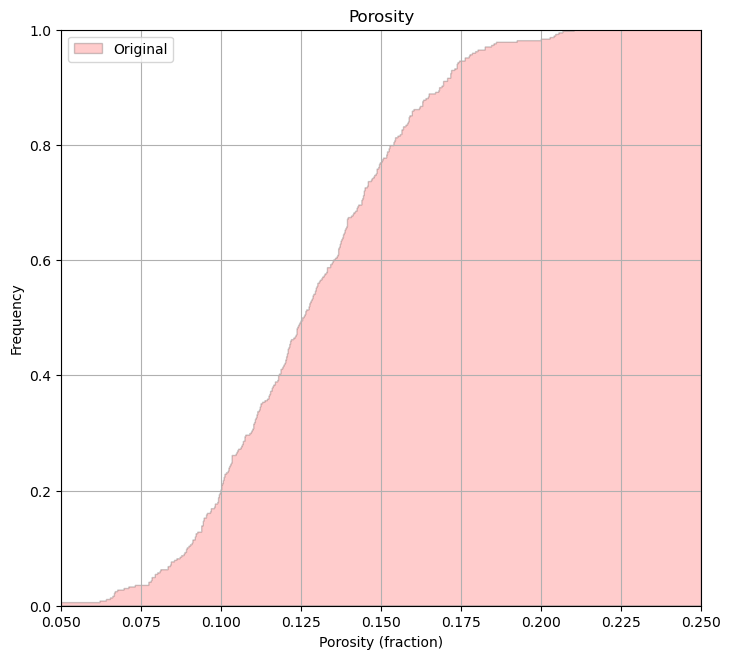

In [7]:
plt.subplot(111)                                        # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

We can observe from the CDFs that the porosity distribution is 'Gaussian-like' in shape, while the permeability distribution is 'lognormal-like'.  They both look well behaved.

For brevity we will omit data declustering from this workflow. We will assume declustered means for the porosity and permeability to apply with simple kriging.

Let's plot the location maps of porosity and permeability for all facies. We will also include a cross plot of permeability vs. porosity colored by facies to aid with comparison in spatial features between the porosity and permeability data.

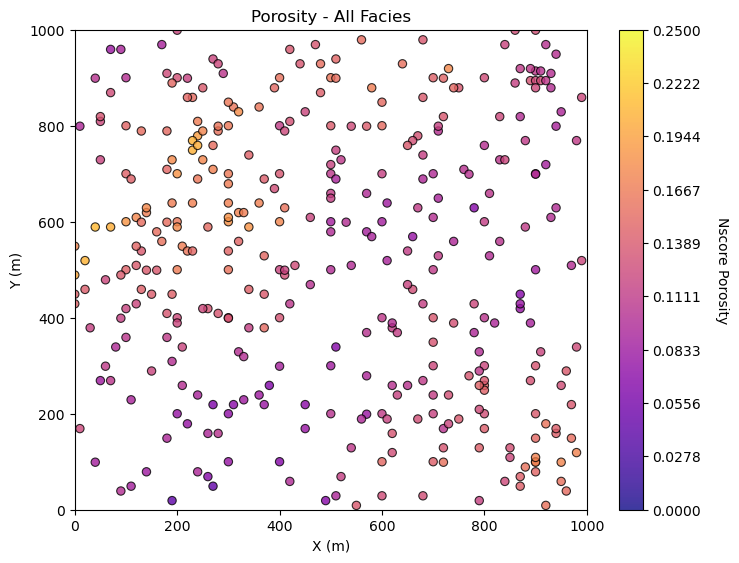

In [8]:
cmap = plt.cm.plasma                    # color map
plt.subplot(111)
GSLIB.locmap_st(df,'X','Y','Porosity',0,1000,0,1000,0,0.25,'Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.5, hspace=0.3)
plt.show()

#### Inverse Distance

To demonstrate inverse distance, we include a inverse distance function.  

* it is a modification of the 2D kriging program in GeostatsPy 

In [9]:
import scipy.spatial as sp  # for fast nearest neighbor search

def invdist(
    df,
    xcol,
    ycol,
    vcol,
    tmin,
    tmax,
    nx,
    xmn,
    xsiz,
    ny,
    ymn,
    ysiz,
    ndmin,
    ndmax,
    radius,
    power
):
    """ Inverse Distance to Python by Michael Pyrcz, the University of Texas at
    Austin (April, 2020).  Based on modification of the GSLIB kb2d program by Deutsch and Journel (1997)
    :param df: pandas DataFrame with the spatial data
    :param xcol: name of the x coordinate column
    :param ycol: name of the y coordinate column
    :param vcol: name of the property column
    :param tmin: property trimming limit
    :param tmax: property trimming limit
    :param nx: definition of the grid system (x axis)
    :param xmn: definition of the grid system (x axis)
    :param xsiz: definition of the grid system (x axis)
    :param ny: definition of the grid system (y axis)
    :param ymn: definition of the grid system (y axis)
    :param ysiz: definition of the grid system (y axis)
    :param ndmin: minimum number of data points to use for kriging a block
    :param ndmax: maximum number of data points to use for kriging a block
    :param radius: maximum isotropic search radius
    :param power: the inverse distance power
    :return:
    """
    
# Constants
    UNEST = -999.
    EPSLON = 1.0e-10
    VERSION = 0.1
        
# Load the data
    df_extract = df.loc[(df[vcol] >= tmin) & (df[vcol] <= tmax)]    # trim values outside tmin and tmax
    nd = len(df_extract)
    ndmax = min(ndmax,nd)
    x = df_extract[xcol].values
    y = df_extract[ycol].values
    vr = df_extract[vcol].values
    
# Allocate the needed memory:   
    xa = np.zeros(ndmax)
    ya = np.zeros(ndmax)
    vra = np.zeros(ndmax)
    dist = np.zeros(ndmax)
    nums = np.zeros(ndmax)
    s = np.zeros(ndmax)
    estmap = np.zeros((nx,ny))
    
# Make a KDTree for fast search of nearest neighbours   
    dp = list((y[i], x[i]) for i in range(0,nd))
    data_locs = np.column_stack((y,x))
    tree = sp.cKDTree(data_locs, leafsize=16, compact_nodes=True, copy_data=False, balanced_tree=True)

# Summary statistics for the data after trimming
    avg = vr.mean()
    stdev = vr.std()
    ss = stdev**2.0
    vrmin = vr.min()
    vrmax = vr.max()

# Initialize accumulators:
    rad2 = radius*radius

# MAIN LOOP OVER ALL THE BLOCKS IN THE GRID:
    nk = 0
    ak = 0.0
    vk = 0.0
    for iy in range(0,ny):
        yloc = ymn + (iy-0)*ysiz  
        for ix in range(0,nx):
            xloc = xmn + (ix-0)*xsiz
            current_node = (yloc,xloc)
        
# Find the nearest samples within each octant: First initialize
# the counter arrays:
            na = -1   # accounting for 0 as first index
            dist.fill(1.0e+20)
            nums.fill(-1)
            dist, nums = tree.query(current_node,ndmax) # use kd tree for fast nearest data search
            # remove any data outside search radius
            nums = nums[dist<radius]
            dist = dist[dist<radius] 
            nd = len(dist)        
            
# Is there enough samples?
            if nd < ndmin:   # accounting for min index of 0
                est  = UNEST
#                print('UNEST at ' + str(ix) + ',' + str(iy))  # option to include this error
            else:

# Put coordinates and values of neighborhood samples into xa,ya,vra:
                for ia in range(0,nd):
                    jj = int(nums[ia])
                    xa[ia]  = x[jj]
                    ya[ia]  = y[jj]
                    vra[ia] = vr[jj]
                    
# Solve for weights
                dist = np.sqrt((xa-xloc)*(xa-xloc) + (ya-yloc)*(ya-yloc)) 
                s = 1/((dist + EPSLON)**power)        # calculate inverse weights
                s = s / np.sum(s)             # constrain sum of the weights to 1.0 for unbiasedness
                est = 0.0                
                for ia in range(0,nd):
                    est = est + s[ia] * vra[ia]
                
            estmap[ny-iy-1,ix] = est

# Track the estimates
            if est > UNEST:
                nk = nk + 1
                ak = ak + est
                vk = vk + est*est

# END OF MAIN LOOP OVER ALL THE BLOCKS:

    if nk >= 1:
        ak = ak / float(nk)
        vk = vk/ float(nk) - ak*ak
        print('  Estimated   ' + str(nk) + ' blocks ')
        print('      average   ' + str(ak) + '  variance  ' + str(vk))

    return estmap


#### Simple Test at Single Location

Let's test the method for a single estimation location.

* the result was validated with by-hand calculation for inside range, outside range and collocated with a data point

In [9]:
x = [100,600,800]; y = [100,500,700]; vr = [1.0,2.0,3.0]
dftest1 = pd.DataFrame({'X':x,'Y':y,'Var':vr})
tmin = -9999.9; tmax = 9999.9; 
nx = 1; xsiz = 10.0; xmn = 500
ny = 1; ysiz = 10.0; ymn = 500
ndmin = 1; ndmax = 100
radius = 1000.0; power = 2

invdist_est = invdist(dftest1,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius,power)
print('The single estimate at x = ' + str(xmn) + ', y = ' + str(ymn) + ' is ' + str(invdist_est[0][0]) + '.')

  Estimated   1 blocks 
      average   2.041214750542347  variance  0.0
The single estimate at x = 500, y = 500 is 2.041214750542347.


#### Build a Estimation Map

Now we check the method by building maps with 3 different powers

  Estimated   10000 blocks 
      average   2.4785256874279527  variance  0.18122365890746384
  Estimated   10000 blocks 
      average   2.4797288690464803  variance  0.5062609912988218
  Estimated   10000 blocks 
      average   2.4893068152705276  variance  0.7378534388298741


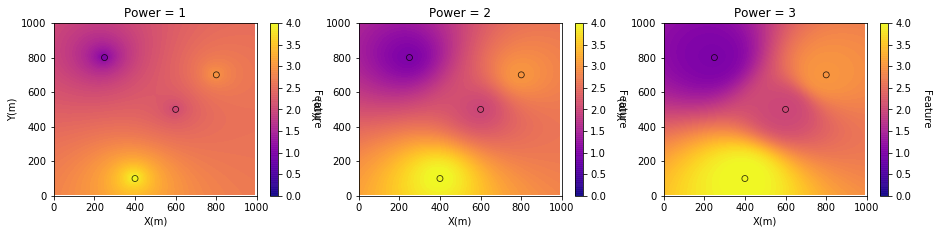

In [10]:
x = [250,600,800,400]; y = [800,500,700,100]; vr = [1.0,2.0,3.0,4.0]
dftest2 = pd.DataFrame({'X':x,'Y':y,'Var':vr})
tmin = -9999.9; tmax = 9999.9; 
nx = 100; xsiz = 10.0; xmn = 5.0; xmin = xmn - 0.5 * xsiz; xmax = xmin + nx * xsiz
ny = 100; ysiz = 10.0; ymn = 5.0; ymin = ymn - 0.5 * ysiz; ymax = ymin + ny * ysiz
ndmin = 1; ndmax = 100
radius = 10000.0; power = 2

invdist_map_power1 = invdist(dftest2,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius,power=1)
invdist_map_power2 = invdist(dftest2,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius,power=2)
invdist_map_power3 = invdist(dftest2,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius,power=3)

# plot the reuslting estimated maps
plt.subplot(131)
GSLIB.locpix_st(invdist_map_power1,xmin,xmax,ymin,ymax,xsiz,0.0,4.0,dftest2,'X','Y','Var','Power = 1','X(m)','Y(m)','Feature',cmap)

plt.subplot(132)
GSLIB.locpix_st(invdist_map_power2,xmin,xmax,ymin,ymax,xsiz,0.0,4.0,dftest2,'X','Y','Var','Power = 2','X(m)','Y(m)','Feature',cmap)

plt.subplot(133)
GSLIB.locpix_st(invdist_map_power3,xmin,xmax,ymin,ymax,xsiz,0.0,4.0,dftest2,'X','Y','Var','Power = 3','X(m)','Y(m)','Feature',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.6, wspace=0.2, hspace=0.2) 
plt.show()

#### Check the Impact of Radius

Radius is the maximum distance to look for neighbouring data

* limited radius may result is image artifacts as data abruptly are excluded

  Estimated   1264 blocks 
      average   2.39116744243245  variance  1.049982892969484
  Estimated   9852 blocks 
      average   1.8721620915639599  variance  0.7914133099779668
  Estimated   10000 blocks 
      average   2.4797288690464803  variance  0.5062609912988218


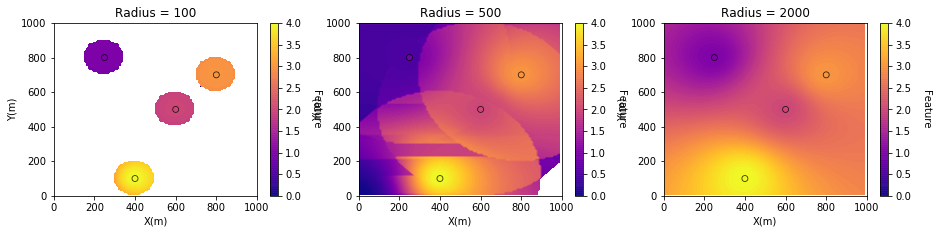

In [11]:
x = [250,600,800,400]; y = [800,500,700,100]; vr = [1.0,2.0,3.0,4.0]
dftest3 = pd.DataFrame({'X':x,'Y':y,'Var':vr})
tmin = -9999.9; tmax = 9999.9; 
nx = 100; xsiz = 10.0; xmn = 5.0; xmin = xmn - 0.5 * xsiz; xmax = xmin + nx * xsiz
ny = 100; ysiz = 10.0; ymn = 5.0; ymin = ymn - 0.5 * ysiz; ymax = ymin + ny * ysiz
ndmin = 1; ndmax = 100
power = 2

invdist_map_radius1 = invdist(dftest3,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius = 100,power=2)
invdist_map_radius2 = invdist(dftest3,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius = 500,power=2)
invdist_map_radius3 = invdist(dftest3,'X','Y','Var',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius = 2000,power=2)

# plot the reuslting estimated maps
plt.subplot(131)
GSLIB.locpix_st(invdist_map_radius1,xmin,xmax,ymin,ymax,xsiz,0.0,4.0,dftest3,'X','Y','Var','Radius = 100','X(m)','Y(m)','Feature',cmap)

plt.subplot(132)
GSLIB.locpix_st(invdist_map_radius2,xmin,xmax,ymin,ymax,xsiz,0.0,4.0,dftest3,'X','Y','Var','Radius = 500','X(m)','Y(m)','Feature',cmap)

plt.subplot(133)
GSLIB.locpix_st(invdist_map_radius3,xmin,xmax,ymin,ymax,xsiz,0.0,4.0,dftest3,'X','Y','Var','Radius = 2000','X(m)','Y(m)','Feature',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.6, wspace=0.2, hspace=0.2) 
plt.show()

#### Inverse Distance Porosity Map

Now we are ready to build a map of our porosity spatial feature.

* try experimenting with various powers and radii

  Estimated   10000 blocks 
      average   0.12259182211006514  variance  0.0005453252377003847


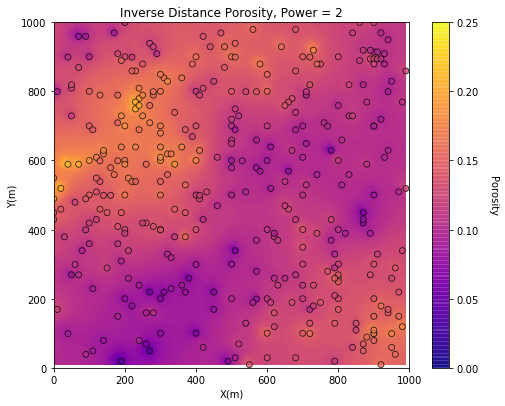

In [12]:
tmin = -9999.9; tmax = 9999.9; 
nx = 100; xsiz = 10.0; xmn = 5.0; xmin = xmn - 0.5 * xsiz; xmax = xmin + nx * xsiz
ny = 100; ysiz = 10.0; ymn = 5.0; ymin = ymn - 0.5 * ysiz; ymax = ymin + ny * ysiz
ndmin = 1; ndmax = 100
radius = 2000; power = 2

invdist_map_porosity = invdist(df,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,ndmin,ndmax,radius,power)

# plot the reuslting estimated maps
plt.subplot(131)
GSLIB.locpix_st(invdist_map_porosity,xmin,xmax,ymin,ymax,xsiz,0.0,0.25,df,'X','Y','Porosity','Inverse Distance Porosity, Power = ' + str(power),'X(m)','Y(m)','Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.5, top=1.2, wspace=0.2, hspace=0.2) 
plt.show()

#### Comments

This was a basic demonstration of spatial estimation. Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
